# Wearable - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Análise das estruturas e composições dos datasets

### Dados tratados, com inclusão das features

In [3]:
p001 = pd.read_parquet("data/data_processed/participants/p001/chunk_001.parquet")
p001.head()

,pid,window_start,window_end,n_samples,duration_seconds,sex,age_group,label:Walmsley2020,label:Walmsley2020_enc,label:WillettsSpecific2018,label:WillettsSpecific2018_enc,label:WillettsMET2018,label:WillettsMET2018_enc,x_mean,x_std,x_min,x_max,y_mean,y_std,y_min,y_max,z_mean,z_std,z_min,z_max,energy_x,energy_y,energy_z,energy_total,magnitude_mean,corr_xy,corr_xz,corr_yz,fft_dom_freq,fft_peak_power,hour_sin,hour_cos
0,P001,2016-11-13 03:41:20,2016-11-13 03:41:25,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.953208,0.004244,-0.9676,-0.951957,-0.162301,0.005734,-0.175341,-0.15978,0.206729,0.006897,0.195613,0.211009,0.908624,0.026374,0.042784,0.977782,0.988819,-0.089637,-0.018430,0.078536,5.2,0.000002,0.822475,0.568801
1,P001,2016-11-13 03:41:25,2016-11-13 03:41:30,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.953396,0.004521,-0.9676,-0.951957,-0.162923,0.006248,-0.175341,-0.15978,0.206513,0.007000,0.195613,0.211009,0.908984,0.026583,0.042697,0.978264,0.989061,-0.091209,-0.006575,-0.016346,5.4,0.000003,0.822682,0.568502
2,P001,2016-11-13 03:41:30,2016-11-13 03:41:35,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.953485,0.004651,-0.9676,-0.951893,-0.162084,0.005526,-0.175359,-0.15978,0.206404,0.007056,0.195613,0.211209,0.909156,0.026302,0.042652,0.978110,0.988983,-0.099411,0.004541,-0.100600,5.2,0.000002,0.822889,0.568203
3,P001,2016-11-13 03:41:35,2016-11-13 03:41:40,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.953556,0.004775,-0.9676,-0.951893,-0.162215,0.005647,-0.175359,-0.15978,0.207000,0.006804,0.195613,0.211209,0.909292,0.026346,0.042895,0.978533,0.989197,-0.092313,0.061626,0.015535,1.2,0.000002,0.823095,0.567904
4,P001,2016-11-13 03:41:40,2016-11-13 03:41:45,500,4.99,1,2,sleep,3,sleep,5,sleep,5,-0.953490,0.004651,-0.9676,-0.951957,-0.162083,0.005526,-0.175341,-0.15978,0.206328,0.007082,0.195613,0.211009,0.909164,0.026301,0.042622,0.978087,0.988972,-0.137379,0.001521,-0.055051,5.8,0.000003,0.823302,0.567604


### Dados crus

In [16]:
p001_raw = pd.read_csv("data/data_raw/capture24/p001.csv.gz")
p001_raw.head()

/var/folders/6b/339vmnzd0r92ld20c6_y04dw0000gn/T/ipykernel_42350/3060091853.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  p001_raw = pd.read_csv("data/data_raw/capture24/p001.csv.gz")


,time,x,y,z,annotation
0,2016-11-13 02:18:00.000000,-0.46669,-0.533341,0.658472,7030 sleeping;MET 0.95
1,2016-11-13 02:18:00.010000,-0.46669,-0.533341,0.658472,7030 sleeping;MET 0.95
2,2016-11-13 02:18:00.020000,-0.46669,-0.533341,0.658472,7030 sleeping;MET 0.95
3,2016-11-13 02:18:00.030000,-0.46669,-0.533341,0.658472,7030 sleeping;MET 0.95
4,2016-11-13 02:18:00.040000,-0.46669,-0.533341,0.658472,7030 sleeping;MET 0.95


### Label Dicctionary

In [18]:
annotation_label = pd.read_csv("data/data_raw/capture24/annotation-label-dictionary.csv")
annotation_label.head()

,annotation,label:WillettsSpecific2018,label:WillettsMET2018,label:DohertySpecific2018,label:Willetts2018,label:Doherty2018,label:Walmsley2020
0,7030 sleeping;MET 0.95,sleep,sleep,sleep,sleep,sleep,sleep
1,occupation;office and administrative support;1...,sitting,sitstand+lowactivity,sedentary-screen,sit-stand,sedentary,sedentary
2,home activity;household chores;preparing meals...,household-chores,sitstand+activity,tasks-moderate,mixed,moderate,light
3,occupation;office and administrative support;1...,sitting,sitstand+lowactivity,sedentary-screen,sit-stand,sedentary,sedentary
4,home activity;miscellaneous;sitting;9060 sitti...,sitting,sitstand+lowactivity,sedentary-non-screen,sit-stand,sedentary,sedentary


## Análise Exploratória

### Metadata

In [19]:
meta_data = pd.read_csv("data/data_raw/capture24/metadata.csv")
meta_data.head()

,pid,age,sex
0,P001,38-52,F
1,P002,30-37,F
2,P003,30-37,F
3,P004,53+,F
4,P005,38-52,F


In [22]:
meta_data["age"].value_counts().sort_index()

age
18-29    43
30-37    37
38-52    37
53+      34
Name: count, dtype: int64

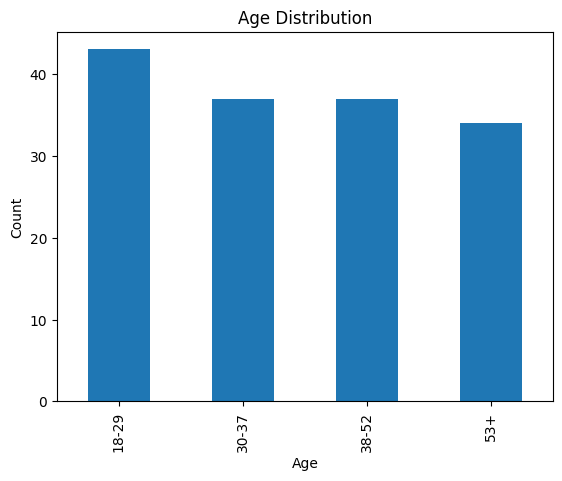

In [20]:
meta_data["age"].value_counts().sort_index().plot(kind='bar', title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()